<a href="https://colab.research.google.com/github/ngocchuong2000/N06_FlagsData_Classification/blob/main/flags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NOTE1/flags.csv')
df.head()

,name,continents,bars,stripes,colours,red,green,blue,gold,white,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
0,Afghanistan,0,0,3,5,1,1,0,1,1,...,0,0,0,0,1,0,0,1,0,0
1,Albania,1,0,0,3,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,Algeria,3,2,0,3,1,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,American-Samoa,4,0,0,5,1,0,1,1,1,...,0,0,0,0,0,0,1,1,1,0
4,Andorra,1,3,0,3,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(193, 22)

In [ ]:
dict = {}
for i in list(df.columns):
  dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict , index=['count']).transpose()

,count
name,193
continents,5
bars,5
stripes,12
colours,8
red,2
green,2
blue,2
gold,2
white,2


In [ ]:
df.isnull().sum().sort_values(ascending=False)

name          0
continents    0
animate       0
icon          0
triangle      0
crescent      0
sunstars      0
quarters      0
saltires      0
crosses       0
circles       0
orange        0
black         0
white         0
gold          0
blue          0
green         0
red           0
colours       0
stripes       0
bars          0
text          0
dtype: int64

In [ ]:
len(df)-len(df.drop_duplicates())

0

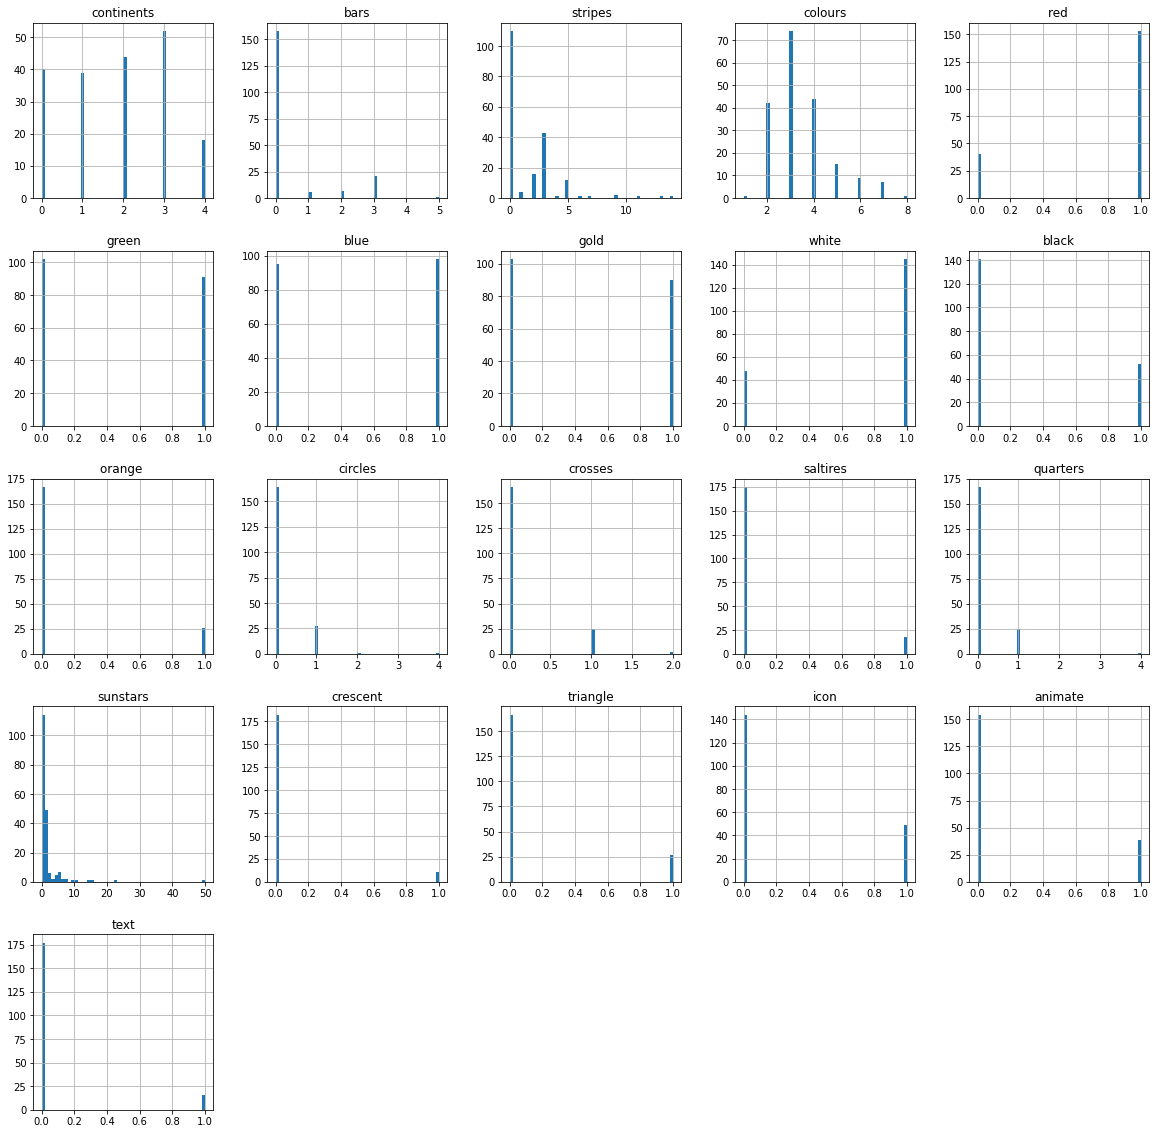

In [ ]:
df.hist(bins = 50, figsize = (20,20))
plt.show()

In [ ]:
df['continents'].value_counts()

3    52
2    44
0    40
1    39
4    18
Name: continents, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


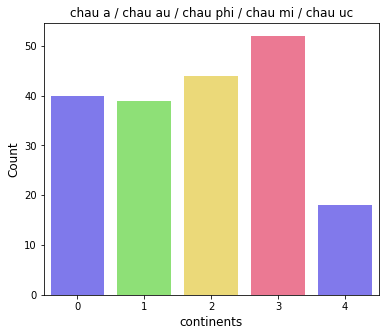

In [ ]:
count = df['continents'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('continents', fontsize=12)
plt.title('chau a / chau au / chau phi / chau mi / chau uc')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


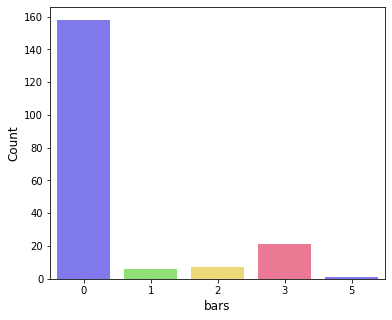

In [ ]:
count = df['bars'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('bars', fontsize=12)
#plt.title('chau a / chau au / chau phi / chau mi / chau uc')
plt.savefig("count_bars.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


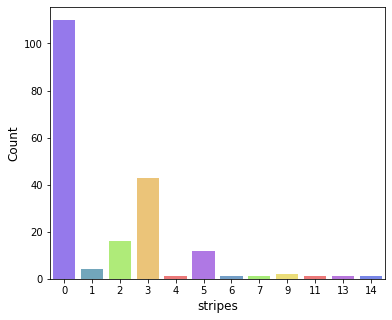

In [ ]:
count = df['stripes'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('stripes', fontsize=12)
#plt.title('chau a / chau au / chau phi / chau mi / chau uc')
#plt.savefig("count_bars.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


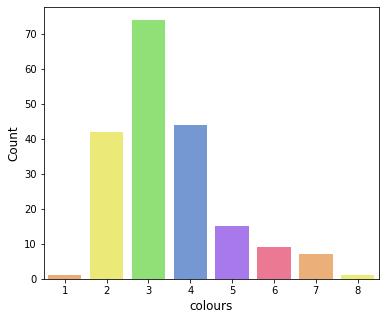

In [ ]:
count = df['colours'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('colours', fontsize=12)
#plt.title('chau a / chau au / chau phi / chau mi / chau uc')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


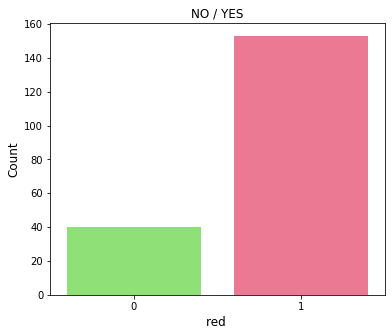

In [ ]:
count = df['red '].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('red ', fontsize=12)
plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


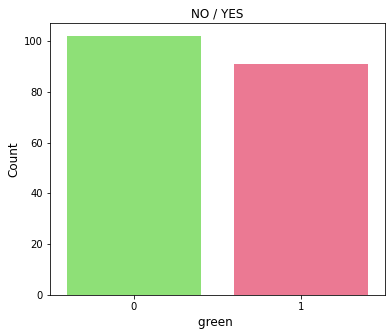

In [ ]:
count = df['green'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('green ', fontsize=12)
plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


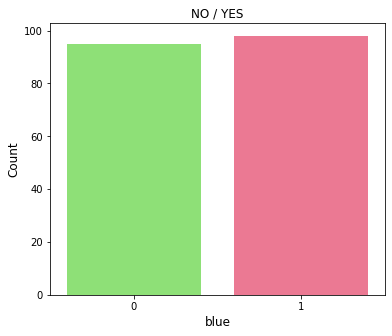

In [ ]:
count = df['blue'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('blue', fontsize=12)
plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


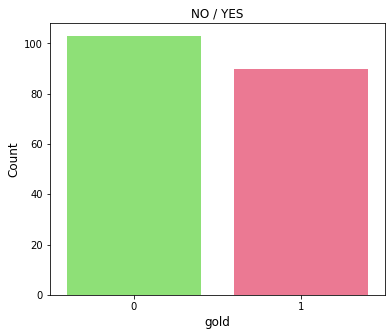

In [ ]:
count = df['gold'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('gold', fontsize=12)
plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


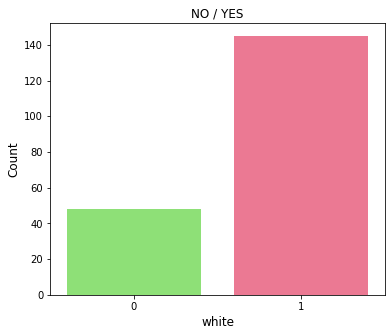

In [ ]:
count = df['white'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('white', fontsize=12)
plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


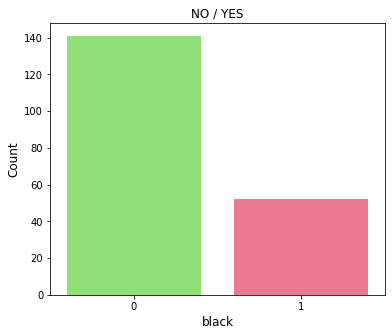

In [ ]:
count = df['black'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('black', fontsize=12)
plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


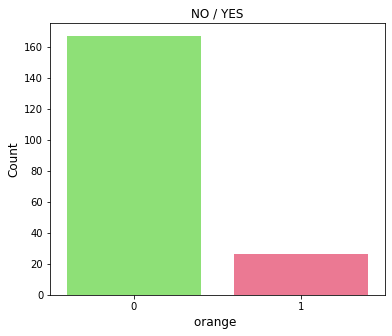

In [ ]:
count = df['orange '].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('orange ', fontsize=12)
plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


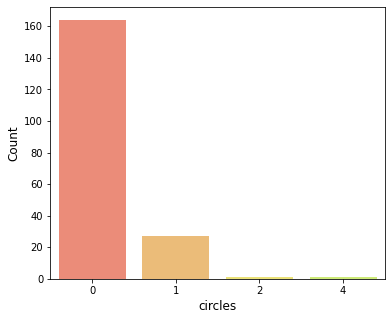

In [ ]:
count = df['circles'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('circles', fontsize=12)
#plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


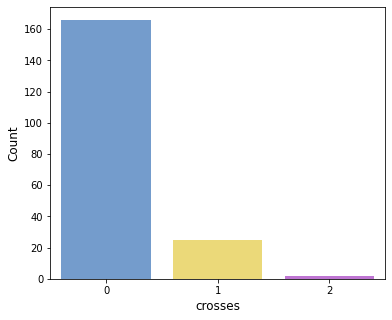

In [ ]:
count = df['crosses'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('crosses', fontsize=12)
#plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


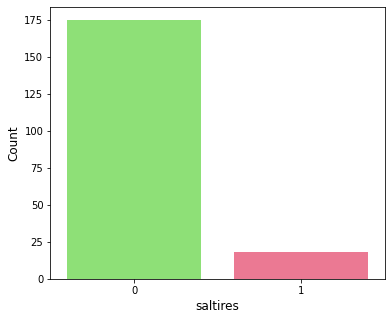

In [ ]:
count = df['saltires'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('saltires', fontsize=12)
#plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


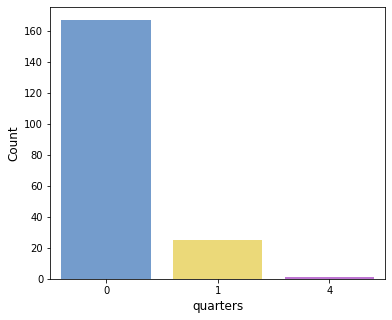

In [ ]:
count = df['quarters'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('quarters', fontsize=12)
#plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


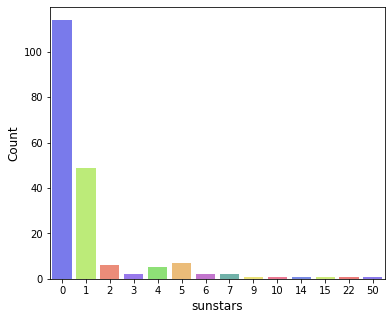

In [ ]:
count = df['sunstars'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('sunstars', fontsize=12)
#plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


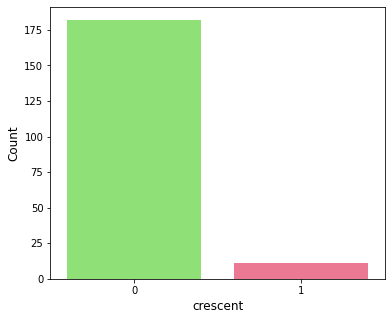

In [ ]:
count = df['crescent'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('crescent', fontsize=12)
#plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


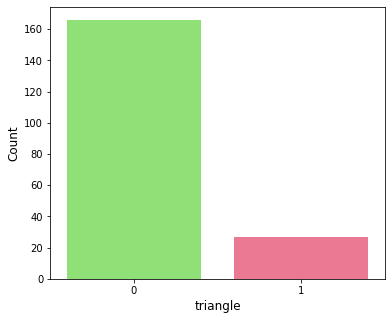

In [ ]:
count = df['triangle'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('triangle', fontsize=12)
#plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


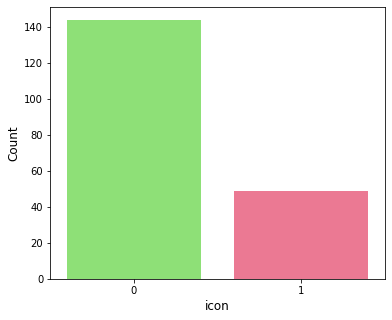

In [ ]:
count = df['icon'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('icon', fontsize=12)
#plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


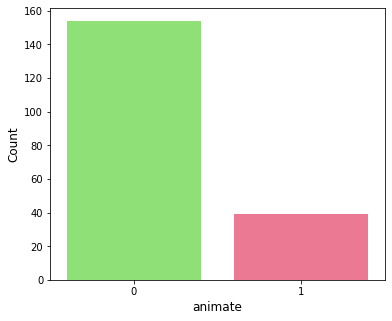

In [ ]:
count = df['animate'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('animate', fontsize=12)
#plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


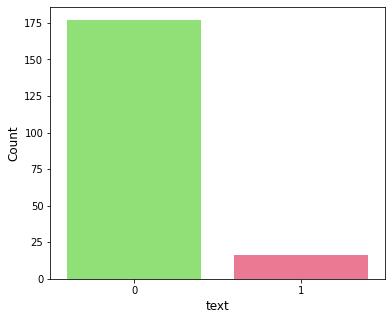

In [ ]:
count = df['text'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('text', fontsize=12)
#plt.title('NO / YES')
#plt.savefig("count_conts.jpeg", format='jpeg', dpi=100)
plt.show()

In [ ]:
#Mã hóa nhãn (chuyển đổi dữ liệu chữ thành số)
#labelencoder=LabelEncoder()
#for column in df.columns:
    #df[column] = labelencoder.fit_transform(df[column])

In [ ]:
#Mã hóa nhãn (chuyển đổi dữ liệu chữ thành số)
#mappings = list()
#encoder = LabelEncoder()
#for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [ ]:
#Xem số liệu sau khi mã hóa data
df.describe()

,name,continents,bars,stripes,colours,red,green,blue,gold,white,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,96.000000,1.839378,0.450777,1.492228,2.466321,0.792746,0.471503,0.507772,0.466321,0.751295,...,0.165803,0.150259,0.093264,0.139896,1.093264,0.056995,0.139896,0.253886,0.202073,0.082902
std,55.858452,1.286996,1.020065,2.111771,1.303103,0.406393,0.500486,0.501240,0.500162,0.433386,...,0.425088,0.386238,0.291559,0.362448,2.241095,0.232436,0.347782,0.436365,0.402590,0.276450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.000000,3.000000,0.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,192.000000,4.000000,4.000000,11.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,2.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,name,continents,bars,stripes,colours,red,green,blue,gold,white,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
0,0,0,0,3,4,1,1,0,1,1,...,0,0,0,0,1,0,0,1,0,0
1,1,1,0,0,2,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,2,3,2,0,2,1,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,3,4,0,0,4,1,0,1,1,1,...,0,0,0,0,0,0,1,1,1,0
4,4,1,3,0,2,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


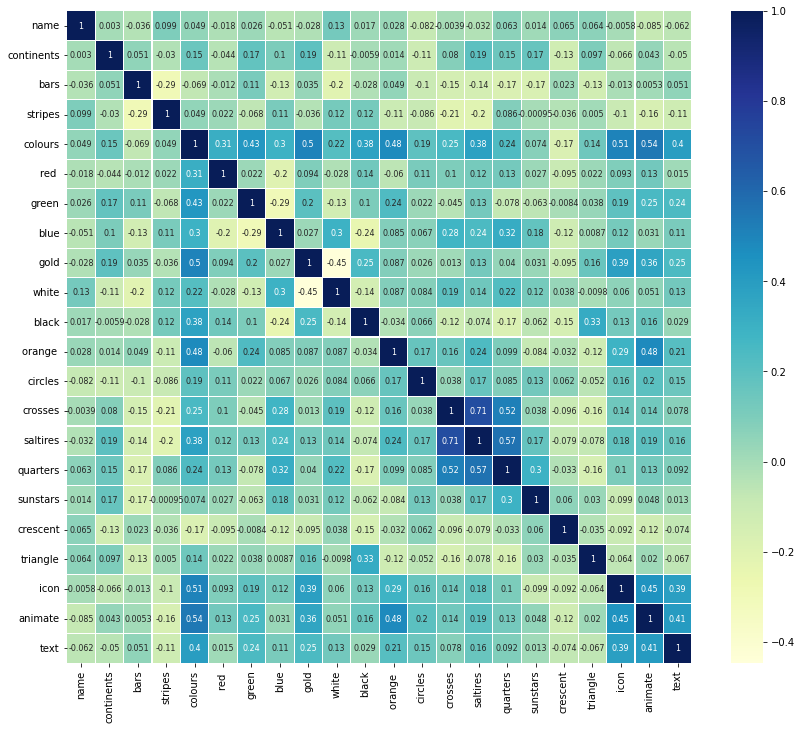

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
#Xử lý dữ liệu để vẽ cây quyết định
X_dt = df.drop(['continents'], axis=1)  
Y = df["continents"]
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y, random_state=42, test_size=0.3)

In [ ]:
def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train_dt, Y_train_dt]
    test_data: [X_test_dt, Y_test_dt]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

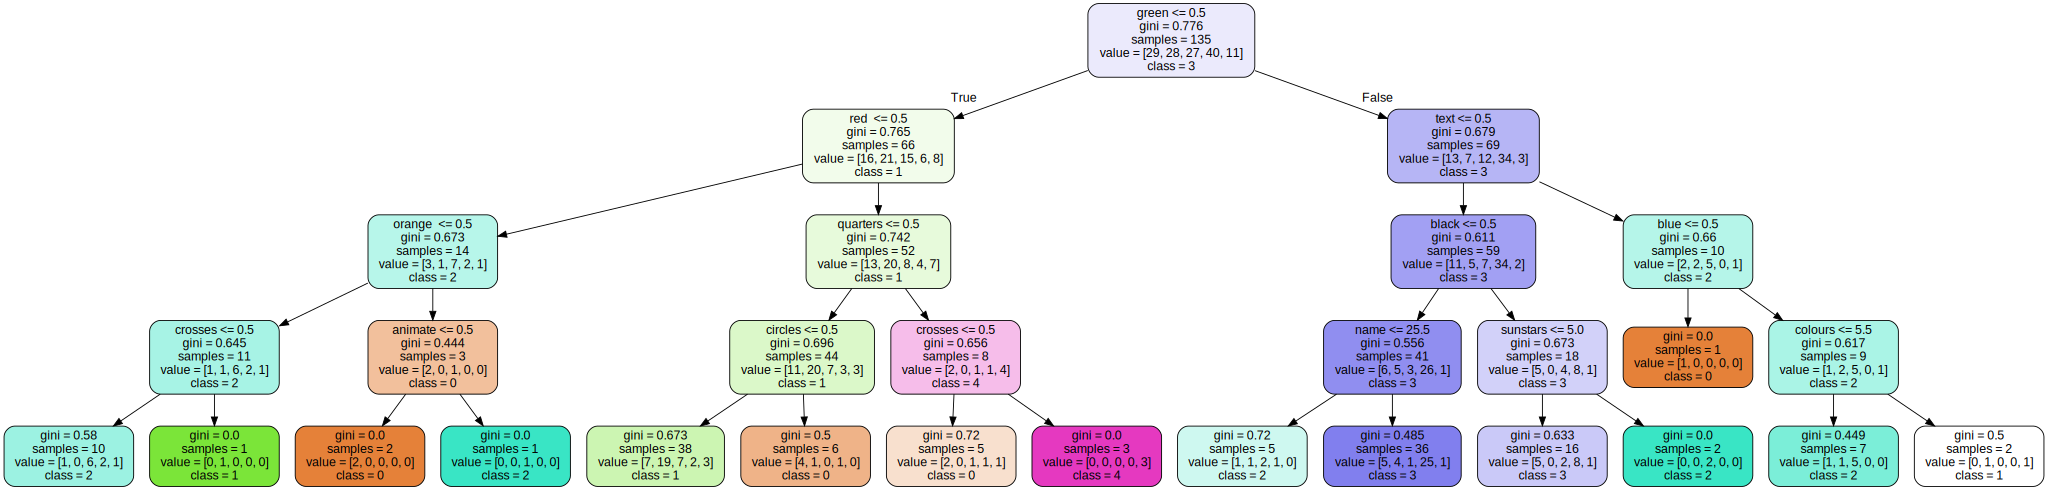

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtree
#y_name =['0','1']
dtree =DecisionTreeClassifier(max_depth = 4, max_features= 6)
dtree.fit(X_train_dt, Y_train_dt)
Y_pred_dt = dtree.predict(X_test_dt)
dot_data = export_graphviz(dtree, out_file=None, 
                         feature_names=X_dt.columns,
                         class_names="01234",
                         filled=" ", rounded=" ")  
graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph

In [ ]:
X_dt = df.drop(['continents'], axis=1)  
Y = df["continents"]

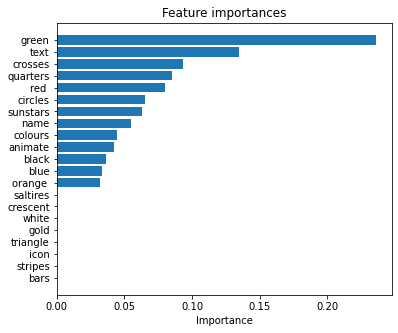

In [ ]:
features_list = X_dt.columns.values
feature_importance = dtree.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(6,5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(Y_test_dt, Y_pred_dt)))
res = cross_val_score(dtree, X_test_dt,Y_test_dt, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test_dt,dtree.predict(X_test_dt))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(dtree.score(X_test_dt, Y_test_dt)*100, 2)))

TEST RESULTS:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       0.43      0.82      0.56        11
           2       0.57      0.24      0.33        17
           3       0.44      0.67      0.53        12
           4       1.00      0.43      0.60         7

    accuracy                           0.48        58
   macro avg       0.58      0.50      0.49        58
weighted avg       0.55      0.48      0.46        58




/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,


Average Accuracy:	0.3133

Standard Deviation:	0.1400

Confusion Matrix:
[[4 3 0 4 0]
 [0 9 1 1 0]
 [2 7 4 4 0]
 [2 2 0 8 0]
 [1 0 2 1 3]]

Accuracy Score:		48.28%


In [ ]:
X=pd.get_dummies(X_dt,columns=X_dt.columns,drop_first=True)
X.head()

,name_1,name_2,name_3,name_4,name_5,name_6,name_7,name_8,name_9,name_10,...,sunstars_9,sunstars_10,sunstars_11,sunstars_12,sunstars_13,crescent_1,triangle_1,icon_1,animate_1,text_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Chia dữ liệu thành các nhóm train và test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=32) #70% training and 30% test
#Chuẩn hóa tập dữ liệu x_train và x_test
sc = preprocessing.StandardScaler().fit(X_train)
X_scaled = sc.transform(X)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
#PCA giảm chiều dữ liệu
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)

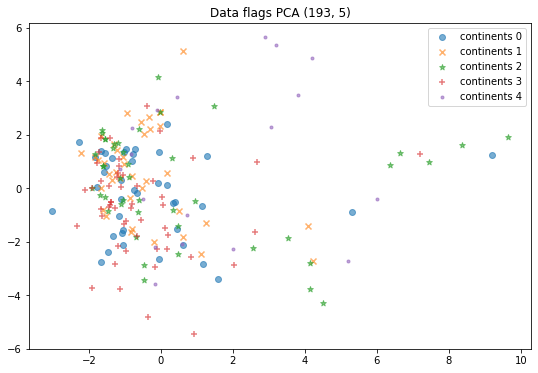

In [ ]:
#Visualize mô hình dữ liệu bằng PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#X_scaled
X_pca = pca.fit_transform(X_scaled)
a_x = X_pca[(Y==0)]
b_x = X_pca[(Y==1)]
c_x = X_pca[(Y==2)]
d_x = X_pca[(Y==3)]
e_x= X_pca[(Y==4)]

#Visualize mô hình PCA
plt.figure(figsize=(9,6))
plt.title('Data flags PCA '+ str(X_pca.shape))
plt.scatter(a_x[:,0],a_x[:,1],marker='o',alpha=0.6)
plt.scatter(b_x[:,0],b_x[:,1],marker='x',alpha=0.6)
plt.scatter(c_x[:,0],c_x[:,1],marker='*',alpha=0.6)
plt.scatter(d_x[:,0],d_x[:,1],marker='+',alpha=0.6)
plt.scatter(e_x[:,0],e_x[:,1],marker='.',alpha=0.6)
plt.legend(['continents 0','continents 1','continents 2', 'continents 3','continents 4'])
#plt.savefig('data_flags_pca.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB
nb = NB()
nb.fit(X_train_pca,Y_train)

GaussianNB()

In [ ]:
Y_pred_nb = nb.predict(X_test_pca)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Naïve Bayes Classifier report:\n\n{}\n'.format(classification_report(Y_test, Y_pred_nb)))
res = cross_val_score(nb, X_test_pca, Y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,nb.predict(X_test_pca))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(nb.score(X_test_pca, Y_test)*100, 2)))

TEST RESULTS:

Naïve Bayes Classifier report:

              precision    recall  f1-score   support

           0       0.33      0.10      0.15        10
           1       0.20      0.70      0.31        10
           2       0.30      0.27      0.29        11
           3       0.70      0.33      0.45        21
           4       0.00      0.00      0.00         6

    accuracy                           0.31        58
   macro avg       0.31      0.28      0.24        58
weighted avg       0.40      0.31      0.30        58


Average Accuracy:	0.3233

Standard Deviation:	0.1909

Confusion Matrix:
[[ 1  7  1  1  0]
 [ 0  7  2  1  0]
 [ 1  6  3  1  0]
 [ 1 11  2  7  0]
 [ 0  4  2  0  0]]

Accuracy Score:		31.03%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_spl

knn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NOTE1/flags.csv')
df.head()

,name,continents,bars,stripes,colours,red,green,blue,gold,white,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
0,Afghanistan,0,0,3,5,1,1,0,1,1,...,0,0,0,0,1,0,0,1,0,0
1,Albania,1,0,0,3,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,Algeria,3,2,0,3,1,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,American-Samoa,4,0,0,5,1,0,1,1,1,...,0,0,0,0,0,0,1,1,1,0
4,Andorra,1,3,0,3,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
print(knn.score(X_test, Y_test))

0.43103448275862066


In [ ]:
print(knn.score(X_train, Y_train))

0.562962962962963


In [140]:
n_neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))
# Loop over different values of k
for i, k in enumerate(n_neighbors):
# Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(k)
# Fit the classifier to the training data
 knn.fit(X_train, Y_train)
 train_accuracy[i] = knn.score(X_train,Y_train)
 test_accuracy[i] = knn.score(X_test, Y_test)

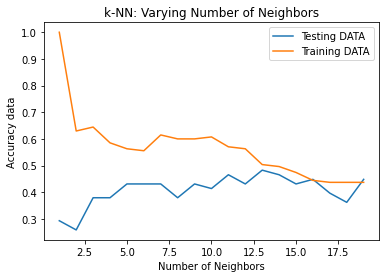

In [141]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(n_neighbors, test_accuracy, label = 'Testing DATA')
plt.plot(n_neighbors, train_accuracy, label = 'Training DATA')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy data')
plt.show()

In [142]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()
knn.fit(X_train_pca,Y_train)

KNeighborsClassifier()

In [143]:
Y_pred_knn = knn.predict(X_test_pca)

In [162]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('K-Nearest Neighbors report:\n\n{}\n'.format(classification_report(Y_test, Y_pred_knn)))
res = cross_val_score(knn, X_test_pca, Y_test, cv=20, n_jobs=1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,knn.predict(X_test_pca))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(knn.score(X_test_pca, Y_test)*100, 5)))

TEST RESULTS:

K-Nearest Neighbors report:

              precision    recall  f1-score   support

           0       0.26      0.50      0.34        10
           1       0.28      0.50      0.36        10
           2       0.50      0.27      0.35        11
           3       0.43      0.29      0.34        21
           4       0.00      0.00      0.00         6

    accuracy                           0.33        58
   macro avg       0.29      0.31      0.28        58
weighted avg       0.34      0.33      0.31        58


Average Accuracy:	0.2667

Standard Deviation:	0.2708

Confusion Matrix:
[[5 1 1 3 0]
 [3 5 0 1 1]
 [3 3 3 2 0]
 [6 8 1 6 0]
 [2 1 1 2 0]]

Accuracy Score:		32.75862%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=20.
  UserWarning,


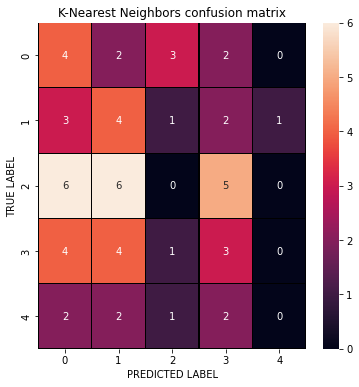

In [161]:
cfm_knn = confusion_matrix(Y_test_dt, Y_pred_knn)

x_axis_labels = ["0", "1" ,"2", "3" ,"4"]
y_axis_labels = ["0", "1" ,"2", "3" ,"4"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_knn, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('K-Nearest Neighbors confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("knncm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

In [150]:
accuracies = {}

In [151]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

In [152]:
accuracy = accuracy_score(Y_test, y_pred)
accuracies['Random Forest Classification'] = accuracy

print(accuracy)

0.4482758620689655


In [153]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [154]:
accuracy = accuracy_score(Y_test, y_pred)
accuracies['Decision Tree Classification'] = accuracy

print( accuracy)

0.3448275862068966


In [155]:
from sklearn.neighbors import KNeighborsClassifier

# metric = 'minkowski', p = 2 means Euclidean distance.
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

In [156]:
accuracy = accuracy_score(Y_test, y_pred)
accuracies['K-NN'] = accuracy

print(accuracy)

0.43103448275862066


In [157]:
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy Score']) 
accuracy_df

,Model Name,Accuracy Score
0,Random Forest Classification,0.448276
1,Decision Tree Classification,0.344828
2,K-NN,0.431034


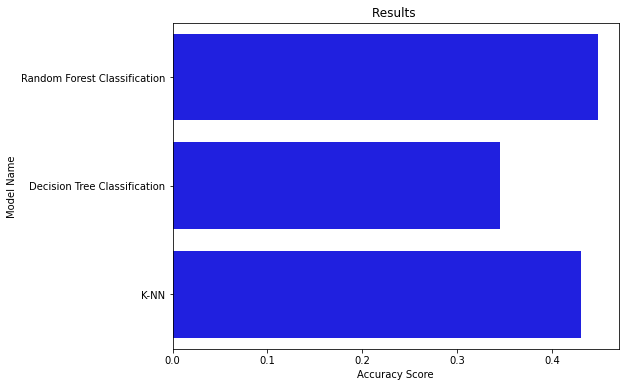

In [158]:
f, ax = plt.subplots(figsize = (8,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'Model Name', x = 'Accuracy Score', data = accuracy_df, color = 'Blue')
plt.title("Results ")
plt.show()